In [1]:
# Modulos a cargar
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Datos
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/hotel.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [2]:
# Nombres de las columnas
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# Valores faltantes
df.isnull().sum().sort_values(ascending=False)*100/df.shape[0]

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
reserved_room_type,0.000000
assigned_room_type,0.000000
booking_changes,0.000000
deposit_type,0.000000
hotel,0.000000
previous_cancellations,0.000000


In [10]:
# Tomemos la decision gerencial de eliminar todas las columnas con valores faltantes
ColumnasEliminar = (df.isnull().sum().sort_values(ascending=False)*100/df.shape[0]).index[:4]
data = df.drop(ColumnasEliminar, axis = 1)
data.info()

# data : todas las variables sin valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_segment  

In [14]:
# Consideremos a las variables de naturaleza cuantitativa
data1 = data.select_dtypes(include = ["float64", "int64"])
# data1 : Todas las variables de naturaleza cuantitativa

In [15]:
# Definicion de las variables independientes (X) y la variable dependiente
y = data1.is_canceled
X = data1.drop("is_canceled", axis = 1)

In [19]:
# Observemos la distribucion de valores en la variable dependiente
y.value_counts()

,count
is_canceled,
0,75166
1,44224


In [21]:
# Particionado
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.88,
                                                stratify = y)

# Instanciamos las clases a modelar
Mod_RegLog_Base = LogisticRegression(max_iter = 5000)
Mod_DT_Base = DecisionTreeClassifier()

# Ajustamos los modelos instanciados usando los subconjuntos de entrenamiento
Mod_RegLog_Base.fit(Xtrain, ytrain)
Mod_DT_Base.fit(Xtrain, ytrain)

# Score
R2_RegLog_Base = Mod_RegLog_Base.score(Xtrain, ytrain)
R2_DT_Base = Mod_DT_Base.score(Xtrain, ytrain)

# Calculemos pronosticos (de la variable dependiente) usando los modelos
# ajustados y el subconjunto de test de la variable independiente
y_pronostico_RegLog_Base = Mod_RegLog_Base.predict(Xtest)
y_pronostico_DT_Base = Mod_DT_Base.predict(Xtest)

# KPI : accuracy_score (metrics)
Acc_RegLog_Base = metrics.accuracy_score(ytest, y_pronostico_RegLog_Base)
Acc_DT_Base = metrics.accuracy_score(ytest, y_pronostico_DT_Base)

# Mostremos los resultados
print("""
Modelo : Regresion Logistica
  R2 : %.3f
  Accuracy : %.3f

Modelo : Arbol de Decision
  R2 : %.3f
  Accuracy : %.3f

""" %(R2_RegLog_Base, Acc_RegLog_Base, R2_DT_Base,Acc_DT_Base ))


Modelo : Regresion Logistica
  R2 : 0.735
  Accuracy : 0.736

Modelo : Arbol de Decision
  R2 : 0.990
  Accuracy : 0.809




In [27]:
# Empaquetemos el codigo de la celda anterior en una funcion que permita analizar la estabilidad
# de los modelos

def Estabilidad_RegLog_DT():
  # Particionado
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.88,
                                                  stratify = y)

  # Instanciamos las clases a modelar
  Mod_RegLog_Base = LogisticRegression(max_iter = 5000)
  Mod_DT_Base = DecisionTreeClassifier()

  # Ajustamos los modelos instanciados usando los subconjuntos de entrenamiento
  Mod_RegLog_Base.fit(Xtrain, ytrain)
  Mod_DT_Base.fit(Xtrain, ytrain)

  # Score
  R2_RegLog_Base = Mod_RegLog_Base.score(Xtrain, ytrain)
  R2_DT_Base = Mod_DT_Base.score(Xtrain, ytrain)

  # Calculemos pronosticos (de la variable dependiente) usando los modelos
  # ajustados y el subconjunto de test de la variable independiente
  y_pronostico_RegLog_Base = Mod_RegLog_Base.predict(Xtest)
  y_pronostico_DT_Base = Mod_DT_Base.predict(Xtest)

  # KPI : accuracy_score (metrics)
  Acc_RegLog_Base = metrics.accuracy_score(ytest, y_pronostico_RegLog_Base)*100
  Acc_DT_Base = metrics.accuracy_score(ytest, y_pronostico_DT_Base)*100

  return R2_RegLog_Base, Acc_RegLog_Base, R2_DT_Base,Acc_DT_Base

In [23]:
# Prueba 1
Estabilidad_RegLog_DT()

(0.7362439679049713,
 0.7329517693864731,
 0.9896918991462266,
 0.8137083827737838)

In [24]:
# Realicemos 1500 ejecuciones de mi funcion Estabilidad_RegLog_DT para observar como
# se comportan los indicadores de calidad para diferentes porciones de mi dataset

ListaR2_RegLog = []
ListaAcc_RegLog = []
ListaR2_DT = []
ListaAcc_DT = []

# En vista que la clase es en tiempo real, no podemos usar mucho tiempo esperando que
# el proceso termine para los 1500 experimentos. Optemos por realizar solo una pequeña
# muestra de 100 experimentos.
for i in range(100):
  (r2_reglog, acc_reglog, r2_dt, acc_dt) = Estabilidad_RegLog_DT()
  ListaR2_RegLog.append(r2_reglog)
  ListaAcc_RegLog.append(acc_reglog)
  ListaR2_DT.append(r2_dt)
  ListaAcc_DT.append(acc_dt)


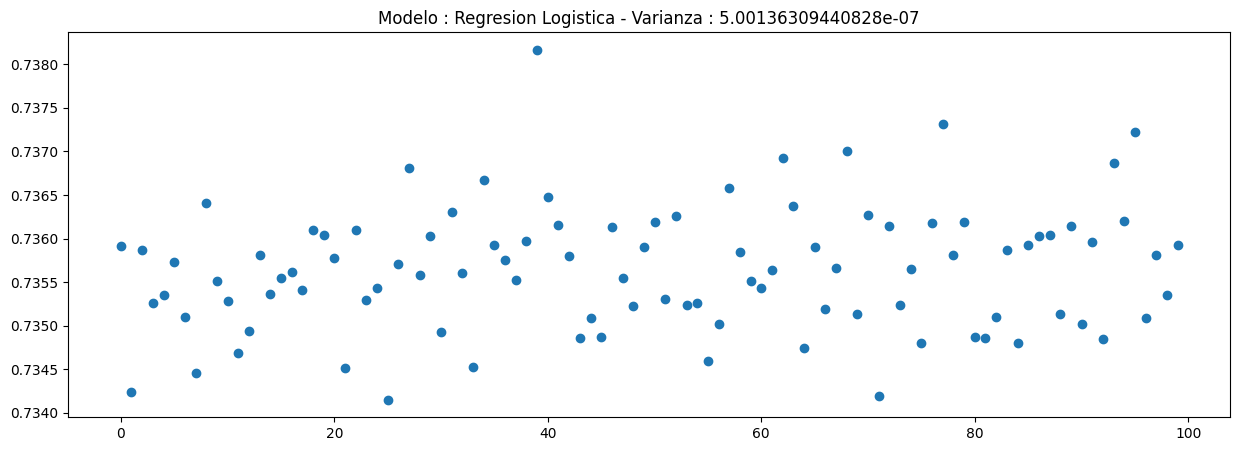

In [26]:
# Mostremos la distribucion de los R2 almacenados en ListaR2_RegLog
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaR2_RegLog)), y = ListaR2_RegLog)
plt.title("Modelo : Regresion Logistica - Varianza : " + str(np.var(ListaR2_RegLog)))
plt.show()

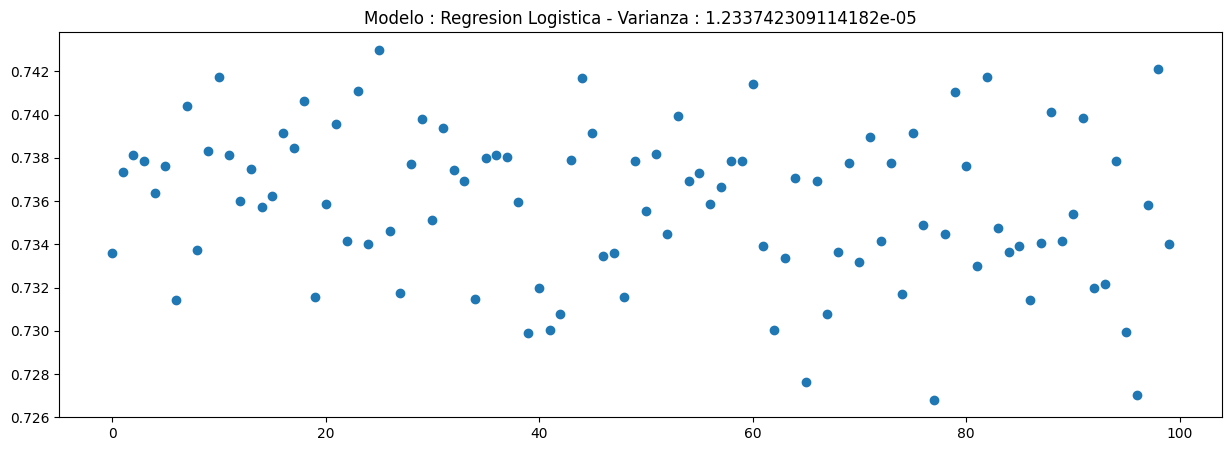

In [28]:
# Mostremos la distribucion de los accuracies almacenados en ListaAcc_RegLog
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaAcc_RegLog)), y = ListaAcc_RegLog)
plt.title("Modelo : Regresion Logistica - Varianza : " + str(np.var(ListaAcc_RegLog)))
plt.show()

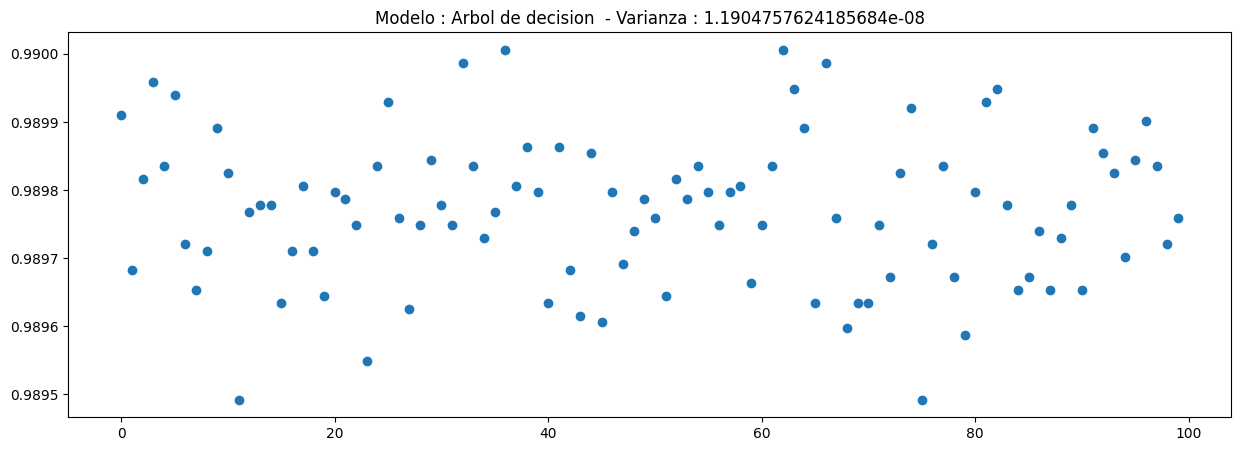

In [29]:
# Mostremos la distribucion de los R2 almacenados en ListaR2_DT
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaR2_DT)), y = ListaR2_DT)
plt.title("Modelo : Arbol de decision  - Varianza : " + str(np.var(ListaR2_DT)))
plt.show()

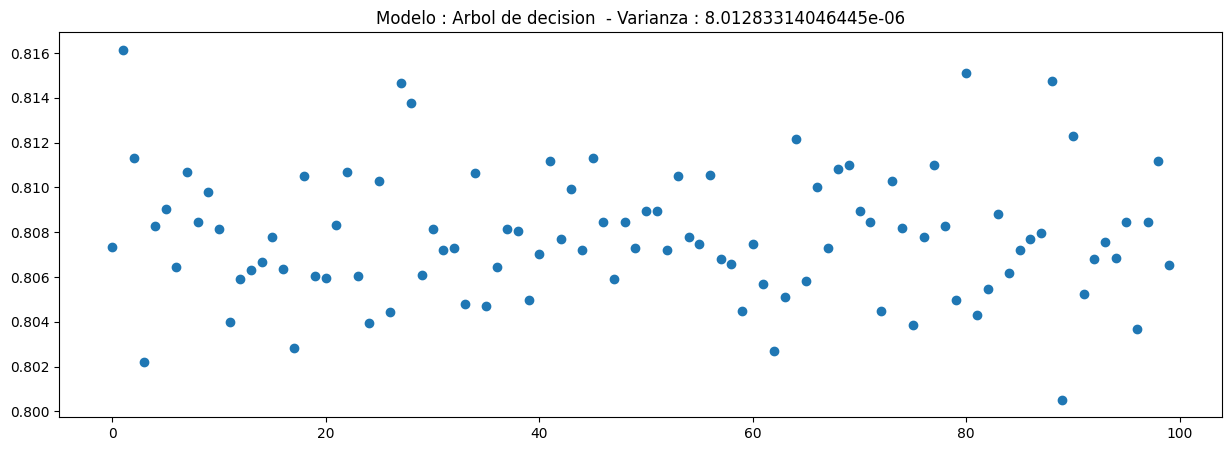

In [30]:
# Mostremos la distribucion de los accuracies  almacenados en ListaAcc_DT
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaAcc_DT)), y = ListaAcc_DT)
plt.title("Modelo : Arbol de decision  - Varianza : " + str(np.var(ListaAcc_DT)))
plt.show()

In [25]:
#
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 